In [1]:
# 필요한 모듈 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 경고 메시지 출력되지 않게 설정
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 주피터 노트북에서 그래프 보이게 설정
%matplotlib notebook

In [3]:
def lprint():
    print("\n-----------------------------------------------------------------------------\n")

In [4]:
# 한글 폰트 설정
import platform
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

# 글씨 선명하게 설정

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

치매유병현황 데이터 링크:
https://data.go.kr/data/15073342/fileData.do

데이터 불러오기 전에 필수로 해야하는 작업이 있습니다. 자세한 내용 리포트 참고해주세요!

In [53]:
# 치매유병현황 데이터 불러오기
df1_1 = pd.read_excel('Data/치매유병현황.xlsx', engine = 'openpyxl', thousands=",")
df1_1.head(15)

,○ 통계표명 :,전국 및 시도별 치매유병현황,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,○ 수록기간 :,년 2015 ~ 2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,○ 출처1 :,치매유병현황: 중앙치매센터,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,○ 출처2 :,"노인인구수: 통계청(주민등록연앙인구, 2015-2020)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"통계청(장래인구추계, 2021-2067)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,○ 자료다운일자 :,2021-05-12 09:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,○ 통계표URL :,https:&#x2F;&#x2F;www.nid.or.kr&#x2F;info&#x2F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,* 홈페이지개편 시 통계표 URL은 달라질 수 있음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,○ 단위 :,"명, %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,항목,NaN,NaN,NaN,NaN,치매환자 유병현황,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ○ 통계표명 :         3308 non-null   object 
 1   전국 및 시도별 치매유병현황  3309 non-null   object 
 2   Unnamed: 2       3301 non-null   object 
 3   Unnamed: 3       3301 non-null   object 
 4   Unnamed: 4       3301 non-null   object 
 5   Unnamed: 5       3303 non-null   object 
 6   Unnamed: 6       3301 non-null   object 
 7   Unnamed: 7       0 non-null      float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
 13  Unnamed: 13      0 non-null      float64
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
dtypes: float64(9), object(7)
memory usage: 414.1+ KB


In [61]:
# 필요한 데이터만 뽑아내기 1
df1_2_1 = df1_1.dropna(axis = 1, thresh=10)
df1_2 = df1_2_1.drop(['Unnamed: 6'], axis = 1)
df1_2.head(15)

,○ 통계표명 :,전국 및 시도별 치매유병현황,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,○ 수록기간 :,년 2015 ~ 2065,NaN,NaN,NaN,NaN
1,○ 출처1 :,치매유병현황: 중앙치매센터,NaN,NaN,NaN,NaN
2,○ 출처2 :,"노인인구수: 통계청(주민등록연앙인구, 2015-2020)",NaN,NaN,NaN,NaN
3,NaN,"통계청(장래인구추계, 2021-2067)",NaN,NaN,NaN,NaN
4,○ 자료다운일자 :,2021-05-12 09:41,NaN,NaN,NaN,NaN
5,○ 통계표URL :,https:&#x2F;&#x2F;www.nid.or.kr&#x2F;info&#x2F...,NaN,NaN,NaN,NaN
6,NaN,* 홈페이지개편 시 통계표 URL은 달라질 수 있음,NaN,NaN,NaN,NaN
7,○ 단위 :,"명, %",NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,항목,NaN,NaN,NaN,NaN,치매환자 유병현황


In [57]:
df1_2.columns

Index(['○ 통계표명 :', '전국 및 시도별 치매유병현황', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [58]:
# column 이름 다시 설정
df1_2.rename(columns={"○ 통계표명 :":"연도", "전국 및 시도별 치매유병현황":"시", "Unnamed: 2":"구", "Unnamed: 3":"성별"
                      , "Unnamed: 4":"연령별", "Unnamed: 5":"환자수"}, inplace=True)
df1_2.head(15)

,연도,시,구,성별,연령별,환자수
0,○ 수록기간 :,년 2015 ~ 2065,NaN,NaN,NaN,NaN
1,○ 출처1 :,치매유병현황: 중앙치매센터,NaN,NaN,NaN,NaN
2,○ 출처2 :,"노인인구수: 통계청(주민등록연앙인구, 2015-2020)",NaN,NaN,NaN,NaN
3,NaN,"통계청(장래인구추계, 2021-2067)",NaN,NaN,NaN,NaN
4,○ 자료다운일자 :,2021-05-12 09:41,NaN,NaN,NaN,NaN
5,○ 통계표URL :,https:&#x2F;&#x2F;www.nid.or.kr&#x2F;info&#x2F...,NaN,NaN,NaN,NaN
6,NaN,* 홈페이지개편 시 통계표 URL은 달라질 수 있음,NaN,NaN,NaN,NaN
7,○ 단위 :,"명, %",NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,항목,NaN,NaN,NaN,NaN,치매환자 유병현황


In [59]:
# 필요한 데이터만 뽑아내기 2 
df1_3 = df1_2.dropna()
df1_3.head()

,연도,시,구,성별,연령별,환자수
10,시점,행정구역(시도)별,행정구역(기초)별,성별,연령별,치매환자
12,2015,서울특별시,종로구,전체,60~64세,53
13,2015,서울특별시,종로구,전체,65~69세,99
14,2015,서울특별시,종로구,전체,70~74세,250
15,2015,서울특별시,종로구,전체,75~79세,547


In [60]:
# 필요한 데이터만 뽑아내기 3
df1_4 = df1_3.drop(10)
df1_4.head()

,연도,시,구,성별,연령별,환자수
12,2015,서울특별시,종로구,전체,60~64세,53
13,2015,서울특별시,종로구,전체,65~69세,99
14,2015,서울특별시,종로구,전체,70~74세,250
15,2015,서울특별시,종로구,전체,75~79세,547
16,2015,서울특별시,종로구,전체,80~84세,542


In [14]:
# 인덱스 다시 설정
df1_4.reset_index(drop=True, inplace=True) # 원래 인덱스 삭제 + 원본 파일 변경
df1_4.head()

,연도,시,구,성별,연령별,환자수
0,2015,서울특별시,종로구,전체,60~64세,53
1,2015,서울특별시,종로구,전체,65~69세,99
2,2015,서울특별시,종로구,전체,70~74세,250
3,2015,서울특별시,종로구,전체,75~79세,547
4,2015,서울특별시,종로구,전체,80~84세,542


In [15]:
# 연도별 환자수
df1_4.groupby(['연도'])["환자수"].sum()

연도
2015    5399250547542745223521834862138189170322929537...
2016    5797243569584768231822615261134196193330965536...
2017    6096237618628818245823985561130214210358102753...
2018    6399236654671880260225405763128229224392109363...
2019    6510123765372094827242659606513022724442863610...
2020    66.98106.63239.96642.56762.831038.212857.17279...
Name: 환자수, dtype: object

In [16]:
df1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      3300 non-null   object
 1   시       3300 non-null   object
 2   구       3300 non-null   object
 3   성별      3300 non-null   object
 4   연령별     3300 non-null   object
 5   환자수     3300 non-null   object
dtypes: object(6)
memory usage: 154.8+ KB


In [17]:
# int 형식으로 바꿔주기 
df1_4[['환자수']] = df1_4[['환자수']].apply(pd.to_numeric)
df1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      3300 non-null   object 
 1   시       3300 non-null   object 
 2   구       3300 non-null   object 
 3   성별      3300 non-null   object 
 4   연령별     3300 non-null   object 
 5   환자수     3300 non-null   float64
dtypes: float64(1), object(5)
memory usage: 154.8+ KB


In [18]:
# 연도별 환자수
df1_g1 = df1_4.groupby(["연도", "성별"])
g1_1 = df1_g1.sum()
g1_1

환자수
연도   성별           
2015 남    85376.00
     여   127578.00
     전체  316133.00
2016 남    90826.00
     여   134086.00
     전체  333854.00
2017 남    97502.00
     여   142137.00
     전체  355771.00
2018 남   104730.00
     여   150305.00
     전체  378737.00
2019 남    56100.00
     여    79079.00
     전체  401568.00
2020 남   176969.37
     여   249658.36
     전체  426627.66

In [19]:
# 행정구역별 환자수
df1_g2 = df1_4[df1_4["성별"]=="전체"].groupby("구")
g1_2 = df1_g2.sum()
g1_2

,환자수
구,
강남구,102116.23
강동구,89034.84
강북구,89287.79
강서구,122877.08
관악구,104024.84
광진구,70093.75
구로구,89730.01
금천구,51387.97
노원구,131269.86


In [20]:
# 성별 환자수
df1_g3 = df1_4.groupby(["성별"])
g1_3 = df1_g3.sum()
g1_3

,환자수
성별,
남,611503.37
여,882843.36
전체,2212690.66


In [21]:
# 시각화

<IPython.core.display.Javascript object>


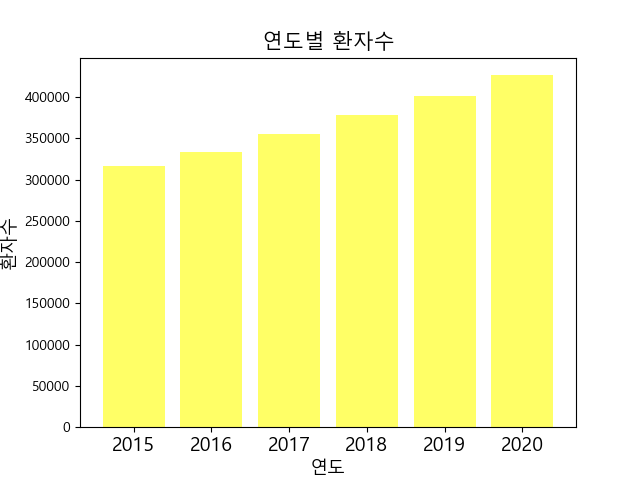

In [22]:
# 시각화 하기 위해 변수 생성
g1_1_all = df1_4[df1_4["성별"] == "전체"].groupby('연도').환자수.sum()

# 연도별 환자수 시각화
label = [2015, 2016, 2017, 2018, 2019, 2020]
index = np.arange(len(label))

plt.bar(index, g1_1_all,
        color='yellow',
        alpha = 0.6,
        linewidth=2.5)
plt.title('연도별 환자수', fontsize=15)
plt.xlabel('연도', fontsize=13)
plt.ylabel('환자수', fontsize=13)
plt.xticks(index, label, rotation=0, fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


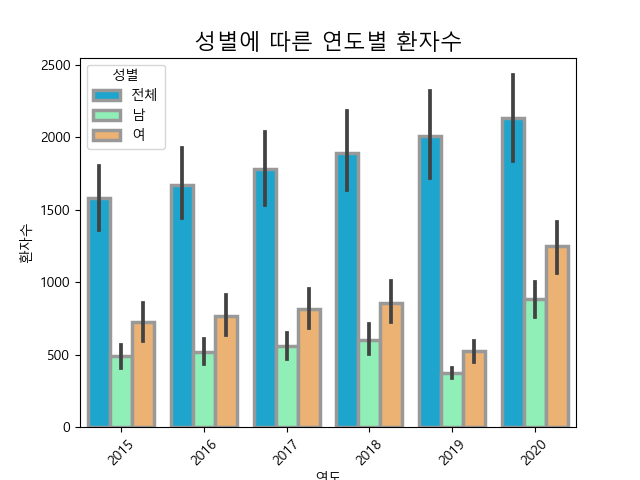

In [23]:
# 성별을 기준으로 연도별 시각화
sns.barplot(data = df1_4, 
            x='연도', 
            y='환자수', 
            hue='성별', 
            palette='rainbow', 
            edgecolor=".6", 
            linewidth=2.5 
            )
plt.title('성별에 따른 연도별 환자수', fontsize=16)
plt.xlabel('연도')
plt.ylabel('환자수')
plt.xticks(rotation=45)
plt.show()           

In [24]:
# 시각화 하기 위해 인덱스 추출
g1_2.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구')

<IPython.core.display.Javascript object>


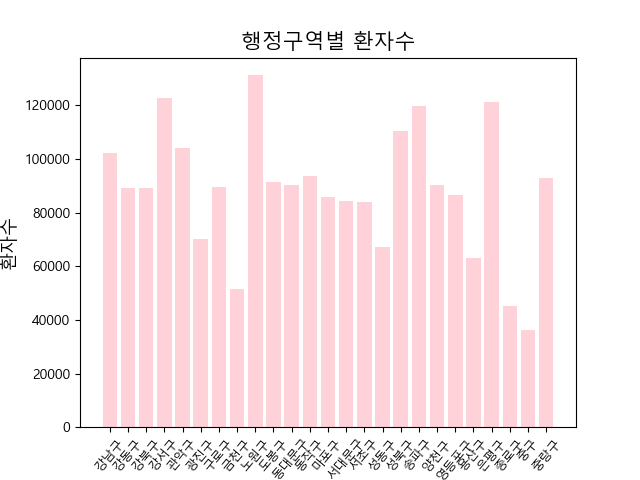

In [25]:
# 시각화 하기 위해 변수 생성
g1_2_all = df1_4[df1_4["성별"] == "전체"].groupby('구').환자수.sum()

# 행정구역별 환자수 시각화
label = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구']
index = np.arange(len(label))

plt.bar(index, g1_2_all,
        color='pink',
        alpha = 0.7,
        linewidth=2.5)
plt.title('행정구역별 환자수', fontsize=15)
plt.xlabel('행정구역', fontsize=13)
plt.ylabel('환자수', fontsize=13)
plt.xticks(index, label, rotation=50, fontsize=9)
plt.show()

In [26]:
lprint()


-----------------------------------------------------------------------------



사망자수 데이터 링크: 
http://data.seoul.go.kr/dataList/11011/S/2/datasetView.do

기간이 만료되어 데이터 자료 압축하여 제출하겠습니다!

In [27]:
# 사망자수 데이터 불러오기
df2_1 = pd.read_csv('Data/report.txt', encoding='utf-8', delimiter='\t')
df2_1.head()

,기간,구분,사망자수(명),사망자수(명).1,사망자수(명).2,사망률(십만명당),사망률(십만명당).1,사망률(십만명당).2
0,기간,구분,계,남자,여자,계,남자,여자
1,2019,합계,837,260,577,8.7,5.6,11.8
2,2019,종로구,9,3,6,6.1,4.2,8
3,2019,중구,10,2,8,8.2,3.3,12.9
4,2019,용산구,25,6,19,11.4,5.7,16.9


In [28]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기간           27 non-null     object
 1   구분           27 non-null     object
 2   사망자수(명)      27 non-null     object
 3   사망자수(명).1    27 non-null     object
 4   사망자수(명).2    27 non-null     object
 5   사망률(십만명당)    27 non-null     object
 6   사망률(십만명당).1  27 non-null     object
 7   사망률(십만명당).2  27 non-null     object
dtypes: object(8)
memory usage: 1.8+ KB


In [29]:
# 필요한 데이터만 뽑아내기 1
df2_2_1 = df2_1.drop(0)
df2_2 = df2_2_1.drop(1)
df2_2.head()

,기간,구분,사망자수(명),사망자수(명).1,사망자수(명).2,사망률(십만명당),사망률(십만명당).1,사망률(십만명당).2
2,2019,종로구,9,3,6,6.1,4.2,8
3,2019,중구,10,2,8,8.2,3.3,12.9
4,2019,용산구,25,6,19,11.4,5.7,16.9
5,2019,성동구,20,7,13,6.7,4.8,8.5
6,2019,광진구,19,8,11,5.5,4.7,6.1


In [30]:
# column 이름 다시 설정
df2_2.rename(columns={"기간":"연도", "구분":"구", "사망자수(명)":"사망자수(전체)",
                      '사망자수(명).1':'사망자수(남자)', '사망자수(명).2':'사망자수(여자)',
                      '사망률(십만명당)':'사망률(전체)', '사망률(십만명당).1':'사망률(남자)',
                      '사망률(십만명당).2':'사망률(여자)'}, inplace=True)
df2_2.head()

,연도,구,사망자수(전체),사망자수(남자),사망자수(여자),사망률(전체),사망률(남자),사망률(여자)
2,2019,종로구,9,3,6,6.1,4.2,8
3,2019,중구,10,2,8,8.2,3.3,12.9
4,2019,용산구,25,6,19,11.4,5.7,16.9
5,2019,성동구,20,7,13,6.7,4.8,8.5
6,2019,광진구,19,8,11,5.5,4.7,6.1


In [31]:
# 인덱스 다시 설정
df2_2.reset_index(drop=True, inplace=True)
df2_2.head()

,연도,구,사망자수(전체),사망자수(남자),사망자수(여자),사망률(전체),사망률(남자),사망률(여자)
0,2019,종로구,9,3,6,6.1,4.2,8
1,2019,중구,10,2,8,8.2,3.3,12.9
2,2019,용산구,25,6,19,11.4,5.7,16.9
3,2019,성동구,20,7,13,6.7,4.8,8.5
4,2019,광진구,19,8,11,5.5,4.7,6.1


In [32]:
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연도        25 non-null     object
 1   구         25 non-null     object
 2   사망자수(전체)  25 non-null     object
 3   사망자수(남자)  25 non-null     object
 4   사망자수(여자)  25 non-null     object
 5   사망률(전체)   25 non-null     object
 6   사망률(남자)   25 non-null     object
 7   사망률(여자)   25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB


In [33]:
# int 형식으로 바꾸기
df2_2[['사망자수(전체)', '사망자수(남자)', '사망자수(여자)',
       '사망률(전체)', '사망률(남자)', '사망률(여자)']] = df2_2[['사망자수(전체)', '사망자수(남자)',
                                                  '사망자수(여자)', '사망률(전체)', '사망률(남자)',
                                                  '사망률(여자)']].apply(pd.to_numeric)
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        25 non-null     object 
 1   구         25 non-null     object 
 2   사망자수(전체)  25 non-null     int64  
 3   사망자수(남자)  25 non-null     int64  
 4   사망자수(여자)  25 non-null     int64  
 5   사망률(전체)   25 non-null     float64
 6   사망률(남자)   25 non-null     float64
 7   사망률(여자)   25 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ KB


In [34]:
# 성별 사망수
sum_all = df2_2['사망자수(전체)'].sum()
sum_male = df2_2['사망자수(남자)'].sum()
sum_female = df2_2['사망자수(여자)'].sum()

print('전체 사망자수:', sum_all)
print('남자 사망자수:', sum_male)
print('여자 사망자수:', sum_female)

전체 사망자수: 837
남자 사망자수: 260
여자 사망자수: 577


In [35]:
# 행정구역별 사망수
g2_1 = df2_2.iloc[:, [1,2]]
g2_1

,구,사망자수(전체)
0,종로구,9
1,중구,10
2,용산구,25
3,성동구,20
4,광진구,19
5,동대문구,30
6,중랑구,35
7,성북구,29
8,강북구,34
9,도봉구,43


<IPython.core.display.Javascript object>


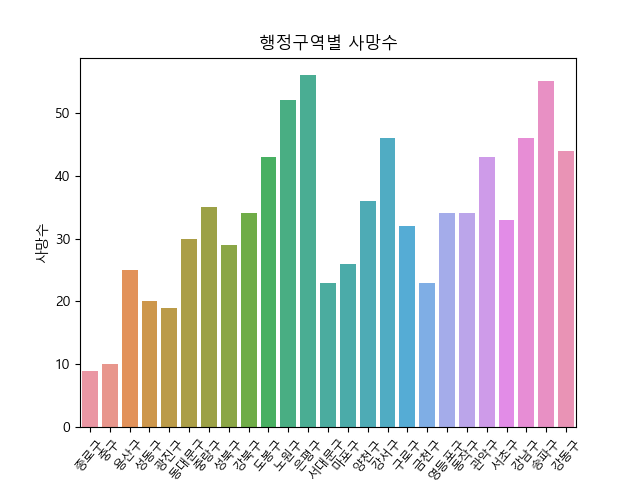

In [36]:
# 행정구역별 시각화
sns.barplot(data=g2_1, x='구', y='사망자수(전체)')
plt.title('행정구역별 사망수')
plt.xlabel('행정구역')
plt.ylabel('사망수')
plt.xticks(rotation=50, fontsize=9)
plt.show()

In [37]:
lprint()


-----------------------------------------------------------------------------



치매센터 데이터 링크: 
    http://data.seoul.go.kr/dataList/OA-20352/S/1/datasetView.do

In [38]:
# 치매센터 데이터 불러오기
df3_1 = pd.read_csv('Data/서울특별시 치매센터(표준데이터).csv', encoding='cp949')
df3_1.head()

,치매센터명,치매센터유형,소재지도로명주소,소재지지번주소,위도,경도,설립년월,건축물면적,부대시설정보,의사인원수,...,운영기관전화번호,운영위탁일자,주요치매관리프로그램소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관기관명,제공기관명,작업일시
0,관악구치매안심센터,치매안심센터,서울특별시 관악구 봉천동 관악로 145 관악구청 3동,서울특별시 관악구 봉천동 1570-1,37.478211,126.951501,2021-11,495.73,사무실(1) 상담실(2)+진료실(1)+프로그램실(3)+가족카페(1) 기타(난곡치매안...,3,...,02-879-4910,NaN,치매조기검진 치매예방 및 등록관리 저소득층 치매의료비 지원 실종예방서비스 지원 ...,02-879-7184,서울특별시 관악구보건소,2021-03-10,NaN,NaN,NaN,2021-04-14 17:59:40.0
1,서대문구치매안심센터,치매안심센터,서울특별시 서대문구 연희로 290,서울특별시 서대문구 홍은2동 425-3,37.582928,126.936446,2020-12,417.37,음악치료실 미술치료실 검진실,1,...,02-379-0183,2019-02-01,힐링건강교실 실버아카데미 치매가족교육,02-330-1738,서대문구보건소,2020-05-20,NaN,NaN,NaN,2021-04-14 17:59:40.0
2,중구치매안심센터,치매안심센터,서울특별시 중구 청구로8길 22,서울특별시 중구 신당동 304-734,37.561304,127.013682,2020-06,576.00,상담실(1) 프로그램실(1) 진료실(1) 강당(1),1,...,02-2238-3400,2017-06-01,치매선별검진 치매치료비지원 치매등록관리 치매가족모임 인지건강프로그램,02-3396-6373,서울특별시 중구청,2021-03-09,NaN,NaN,NaN,2021-04-14 17:59:40.0
3,강북구치매지원센터,치매안심센터,서울특별시 강북구 삼양로476 스마트빌딩 1층 치매안심센터 기억키움쉼터,서울특별시 강북구 수유동 322-14 치매안심센터 기억키움쉼터,37.645808,127.015664,2019-03,85.24,사무실프로그램실검진실,0,...,02-990-9830,2009-07-28,경도치매군 인지재활 프로그램 조기검진 조호물품 사례관리 봉사단체운영및지역자원연계 등,02-901-7755,강북구보건소 지역보건과,2020-09-17,NaN,NaN,NaN,2021-04-14 17:59:40.0
4,강남구치매안심센터,치매안심센터,서울특별시 강남구 선릉로108길 27,서울특별시 강남구 삼성동 113-26,37.510312,127.046378,2009-12,903.24,사무실(1)+강당(1)+다목적홀(1)+진료실(1)+인지검사실(2)+회의실(1)+상담...,2,...,02-3410-2114,2020-01-01,치매조기선별검진 및 정밀검진 인지건강프로그램 및 쉼터 운영 등,02-3423-7123,서울특별시청 강남구보건소,2021-02-25,NaN,NaN,NaN,2021-04-14 17:59:40.0


In [39]:
# 크기 확인 및 정보 확인
print(df3_1.shape)
lprint()
df3_1.info()

(26, 25)

-----------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   치매센터명         26 non-null     object 
 1   치매센터유형        26 non-null     object 
 2   소재지도로명주소      26 non-null     object 
 3   소재지지번주소       25 non-null     object 
 4   위도            26 non-null     float64
 5   경도            26 non-null     float64
 6   설립년월          26 non-null     object 
 7   건축물면적         24 non-null     float64
 8   부대시설정보        23 non-null     object 
 9   의사인원수         26 non-null     int64  
 10  간호사인원수        26 non-null     int64  
 11  사회복지사인원수      26 non-null     int64  
 12  기타인원현황        26 non-null     object 
 13  운영기관명         26 non-null     object 
 14  운영기관대표자명      26 non-null     object 
 15  운영기관전화번호      26 non-null     object 
 16  운영위탁일자        24 non-null    

In [40]:
# 필요한 데이터만 뽑아내기 1
df3_2 = df3_1.dropna(axis=1)
df3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   치매센터명         26 non-null     object 
 1   치매센터유형        26 non-null     object 
 2   소재지도로명주소      26 non-null     object 
 3   위도            26 non-null     float64
 4   경도            26 non-null     float64
 5   설립년월          26 non-null     object 
 6   의사인원수         26 non-null     int64  
 7   간호사인원수        26 non-null     int64  
 8   사회복지사인원수      26 non-null     int64  
 9   기타인원현황        26 non-null     object 
 10  운영기관명         26 non-null     object 
 11  운영기관대표자명      26 non-null     object 
 12  운영기관전화번호      26 non-null     object 
 13  주요치매관리프로그램소개  26 non-null     object 
 14  관리기관전화번호      26 non-null     object 
 15  관리기관명         26 non-null     object 
 16  데이터기준일자       26 non-null     object 
 17  작업일시          26 non-null     object 
dtypes: float64(2), int64(3), object(

In [41]:
# 필요한 데이터만 뽑아내기 2
df3_2.drop(['의사인원수', '간호사인원수', '사회복지사인원수', '기타인원현황',
            '운영기관명', '운영기관대표자명', '운영기관전화번호', '주요치매관리프로그램소개',
       '관리기관전화번호', '관리기관명', '데이터기준일자', '작업일시'], axis=1, inplace=True)
df3_2.head()

,치매센터명,치매센터유형,소재지도로명주소,위도,경도,설립년월
0,관악구치매안심센터,치매안심센터,서울특별시 관악구 봉천동 관악로 145 관악구청 3동,37.478211,126.951501,2021-11
1,서대문구치매안심센터,치매안심센터,서울특별시 서대문구 연희로 290,37.582928,126.936446,2020-12
2,중구치매안심센터,치매안심센터,서울특별시 중구 청구로8길 22,37.561304,127.013682,2020-06
3,강북구치매지원센터,치매안심센터,서울특별시 강북구 삼양로476 스마트빌딩 1층 치매안심센터 기억키움쉼터,37.645808,127.015664,2019-03
4,강남구치매안심센터,치매안심센터,서울특별시 강남구 선릉로108길 27,37.510312,127.046378,2009-12


In [42]:
# 행정구역 column 추가
adress = df3_2['소재지도로명주소'].str.split(expand=True)
df3_2['구'] = adress[1]
df3_2.head()

,치매센터명,치매센터유형,소재지도로명주소,위도,경도,설립년월,구
0,관악구치매안심센터,치매안심센터,서울특별시 관악구 봉천동 관악로 145 관악구청 3동,37.478211,126.951501,2021-11,관악구
1,서대문구치매안심센터,치매안심센터,서울특별시 서대문구 연희로 290,37.582928,126.936446,2020-12,서대문구
2,중구치매안심센터,치매안심센터,서울특별시 중구 청구로8길 22,37.561304,127.013682,2020-06,중구
3,강북구치매지원센터,치매안심센터,서울특별시 강북구 삼양로476 스마트빌딩 1층 치매안심센터 기억키움쉼터,37.645808,127.015664,2019-03,강북구
4,강남구치매안심센터,치매안심센터,서울특별시 강남구 선릉로108길 27,37.510312,127.046378,2009-12,강남구


<IPython.core.display.Javascript object>


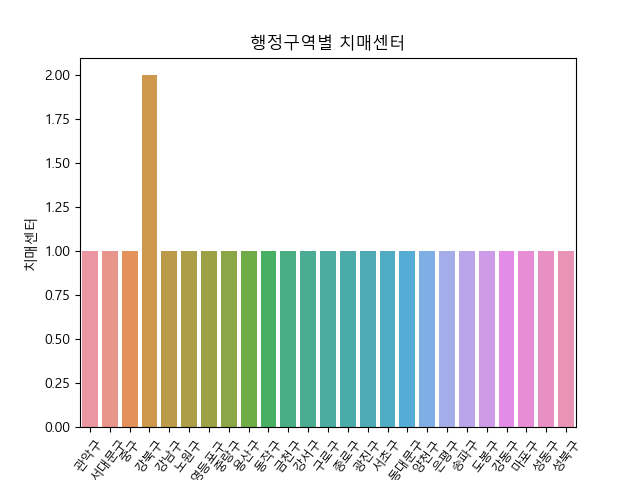

In [43]:
# 치매센터수 시각화
sns.countplot(data=df3_2, x='구')
plt.title('행정구역별 치매센터')
plt.xlabel('행정구역')
plt.ylabel('치매센터')
plt.xticks(rotation=53, fontsize=9)
plt.show()

In [44]:
# 위도, 경도를 이용해 지도에 나타내보기
df3_2[['위도', '경도']]

,위도,경도
0,37.478211,126.951501
1,37.582928,126.936446
2,37.561304,127.013682
3,37.645808,127.015664
4,37.510312,127.046378
5,37.654126,127.056798
6,37.525994,126.893979
7,37.584644,127.080124
8,37.532439,126.990478
9,37.476430,126.973611


<IPython.core.display.Javascript object>


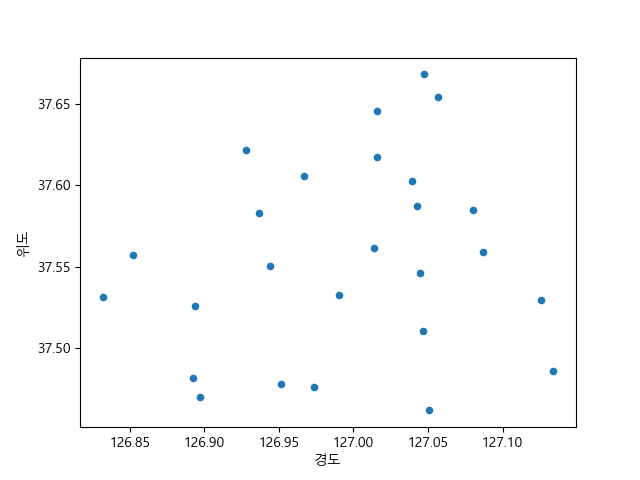

In [45]:
df3_2[['위도', '경도']].plot.scatter(x='경도', y='위도')

In [46]:
!pip install folium

In [47]:
import folium

In [51]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균값 구하기
lat = df3_2['위도'].mean()
long = df3_2['경도'].mean()
print(lat, long)
lprint()
m = folium.Map([lat, long], zoom_start=11)
for i in df3_2.index[:]:
    sub_lat = df3_2.loc[i, '위도']
    sub_long = df3_2.loc[i, '경도']
    
    title = df3_2.loc[i, '치매센터명'] + '-' + df3_2.loc[i, '소재지도로명주소']
    folium.Marker([sub_lat, sub_long], tootip= title).add_to(m)
m

37.5549338279577 126.99453070885383

-----------------------------------------------------------------------------



In [49]:
m = folium.Map([lat, long], zoom_start=11, tiles='stamen toner')

for i in df3_2.index:
    sub_lat = df3_2.loc[i, '위도']
    sub_long = df3_2.loc[i, '경도']
    
    title = f"{df3_2.loc[i, '치매센터명']} - {df3_2.loc[i, '소재지도로명주소']}"
    
    color = 'red'
    
    folium.CircleMarker([sub_lat, sub_long], radius=6, color=color, tooltip=title,).add_to(m)

m

In [50]:
lprint()


-----------------------------------------------------------------------------

